### Name: Ronit Kumar Kataria
### ID: rk06451

# Automobile Data
#### Q1. Read the file 'Automobile.csv' and solve the following question. Please make sure to provide explanation to each output.

##### a. Find the percentage of zeros present in the feature 'symbolling'
##### b. Replace the '?' present in the normalised-losses feature of the dataset with the mean value of the same column
##### c. Do the needful conversion for the 'price' feature in the 'Automobile_data.csv ‘dataset (hint: convert it to numeric) and plot the boxplot between 'price' and 'make' and answer the following questions?

i. Which is the most expensive and the least expensive car?\
ii. Name the premium cars whose price is more than 20,000?\
iii. Name the less expensive cars whose price is less than 10,000?

##### d. Use any visualization technique (think of any suitable plot) which can justify/show that "As the engine size increases, the price also increases proportionally". Explain your findings in that plot.
##### e. Find the city-mpg mean value for each category of drive-wheels and represent them in a bar plot.
##### f. Use boxplot visualization technique to find which is the most expensive drive-wheel cars and least expensive drive-wheels cars?
##### g. Use suitable visualization technique to find the relationship between city-mpg and curb-weight?
\
*** If you are stuck at any question, just make an assumption, write it down in your solution, run your code based on your assumption and move forward. This way you can get partial points. ***

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading AutoMobile CSV file. 
amDF = pd.read_csv('Automobile.csv')

In [3]:
# ##### a. Find the percentage of zeros present in the feature 'symbolling'
perZero = amDF['symboling'].value_counts(normalize=True)
perZero = perZero[0] * 100
print(perZero)



32.6829268292683


In [4]:
# b. Replace the '?' present in the normalised-losses feature of the dataset with the mean value of the same column





amDF['normalized-losses'] = amDF['normalized-losses'].replace('?', np.NaN)

amDF['normalized-losses'] = amDF['normalized-losses'].astype('float64')    

meanReagion = amDF['normalized-losses'].mean()
amDF['normalized-losses'].fillna(meanReagion, inplace=True)
amDF['normalized-losses']


0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

Do the needful conversion for the 'price' feature in the 'Automobile_data.csv ‘dataset (hint: convert it to numeric) and plot the boxplot between 'price' and 'make' and answer the following questions?

i. Which is the most expensive and the least expensive car?\
    ii. Name the premium cars whose price is more than 20, 000?\
    iii. Name the less expensive cars whose price is less than 10, 000?

<AxesSubplot:>

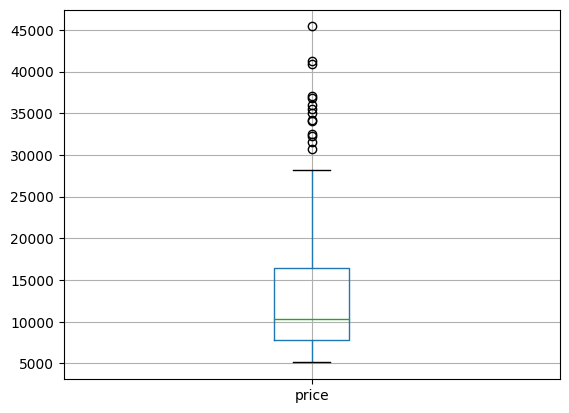

In [5]:
# For price, we will replace the '?' with the mean value of the same column





amDF['price'] = amDF['price'].replace('?', np.NaN)
amDF['price'] = amDF['price'].astype('float64')
meanReagion = amDF['price'].mean()

amDF['price'] = amDF['price'].replace('?', meanReagion)


# Now we will have to box plot the price column to see the outliers
amDF.boxplot(column='price')



<AxesSubplot:xlabel='engine-size', ylabel='price'>

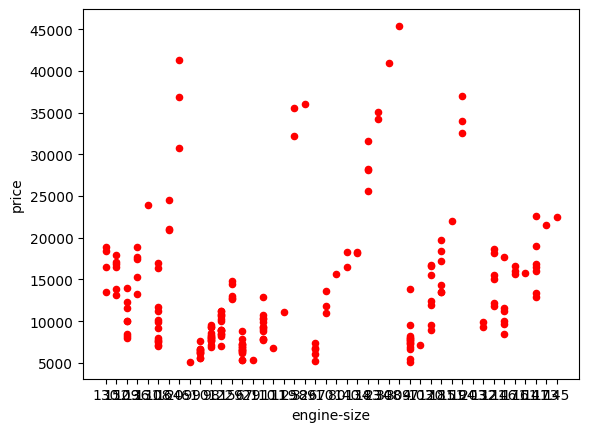

In [6]:
# Use any visualization technique(think of any suitable plot) which can justify/show that "As the engine size increases, the price also increases proportionally". Explain your findings in that plot.

# As both are continous datatype so we can perfrom BiVariate Analysis using Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt
amDF['engine-size'] = amDF['engine-size'].astype(str)
amDF.plot.scatter(
    x='engine-size', y='price', c='red', cmap='viridis')




<AxesSubplot:xlabel='drive-wheels'>

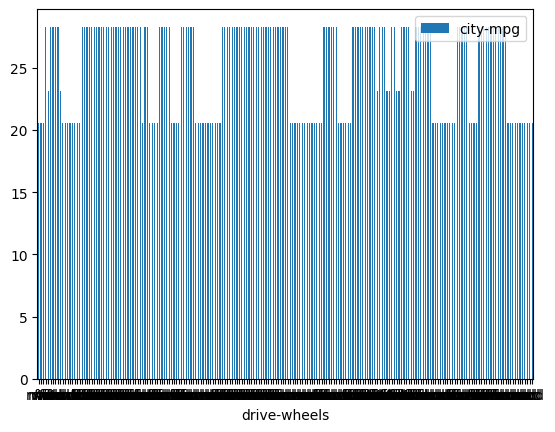

In [7]:
# Find the city-mpg mean value for each category of drive-wheels and represent them in a bar plot.

# Finding Mean value for each category of drive-wheels
amDF['city-mpg'] = amDF['city-mpg'].astype(float)
amDF['city-mpg'] = amDF.groupby('drive-wheels')['city-mpg'].transform('mean')

Mean_Values = amDF['city-mpg']

# amDF['city-mpg'] = amDF['city-mpg'].astype(str)
amDF.plot.bar(x='drive-wheels', y='city-mpg', rot=0)

<AxesSubplot:title={'center':'price'}, xlabel='drive-wheels'>

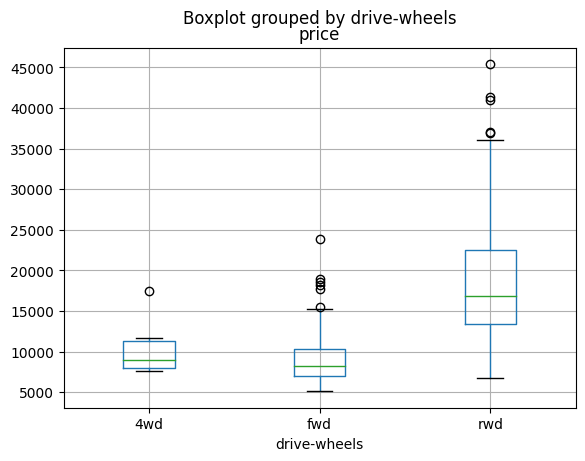

In [8]:
# Use boxplot visualization technique to find which is the most expensive drive-wheel cars and least expensive drive-wheels cars?

# Finding the most expensive drive-wheel cars

amDF.boxplot(column='price', by='drive-wheels')



<AxesSubplot:xlabel='curb-weight', ylabel='city-mpg'>

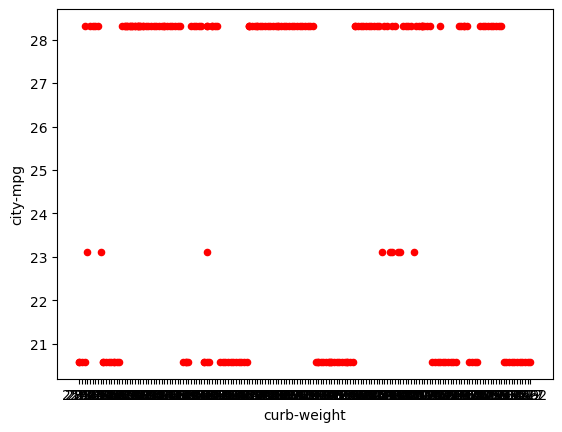

In [9]:
# Use suitable visualization technique to find the relationship between city-mpg and curb-weight?

# As both are continous datatype so we can perfrom BiVariate Analysis using Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt
amDF['curb-weight'] = amDF['curb-weight'].astype(str)
amDF.plot.scatter(
    x='curb-weight', y='city-mpg', c='red', cmap='viridis')





### Analysis:
This shows that there are certain pounts of curb-mpg on which curb weight does not apply and most of the values fal under curb-mpg. 

# Golf Data
#### Q2. Read the file 'GolfData.csv' and solve the following questions. Please make sure to provide explanation to each output.

##### a. Drop the NaN values and change the data type of 'Wins’, ‘Top 10' and 'Rounds' to an integer type.
##### b. Remove ',' from the column 'Points' and convert it into an integer type.
##### c. Remove ',' and '$' from the column 'Money' and convert it into an integer type.
##### d. Make a Distribution plot (histogram or dist plot) for all the features and provide insights on it.
##### e. Find the number of players with "Wins" for each year.
##### f. Find the average number of rounds for each year. Sort them by year. 
##### g. Find the five longest hitters (use Avg Distance).
##### h. Find the five cheapest players
\
*** If you are stuck at any question, just make an assumption, write it down in your solution, run your code based on your assumption and move forward. This way you can get partial points. ***

In [10]:
# Reading thee CSV file
amGD = pd.read_csv('GolfData.csv')

In [11]:
# Making CSV a DataFrame
amGD = pd.DataFrame(amGD)


In [12]:
# a. Drop the NaN values and change the data type of 'Wins’, ‘Top 10' and 'Rounds' to an integer type.

# Drop the NaN values
amGD = amGD.dropna()
amGD['Wins'].astype(int)
amGD['Top 10'].astype(int)
amGD['Rounds'].astype(int)

1       109
16       86
22       87
23      107
27       73
       ... 
1650     91
1657     83
1661     77
1665     81
1673     76
Name: Rounds, Length: 283, dtype: int32

In [13]:
# b. Remove ',' from the column 'Points' and convert it into an integer type.
amGD['Points'] = amGD['Points'].str.replace(',', '')
amGD['Points'].astype(int)


1       1006
16       960
22       744
23      1060
27      1030
        ... 
1650     472
1657    1362
1661    1498
1665     487
1673    1629
Name: Points, Length: 283, dtype: int32

In [14]:
# c. Remove ',' and '$' from the column 'Money' and convert it into an integer type.
amGD['Money'] = amGD['Money'].str.replace(',', '')
amGD['Money'] = amGD['Money'].str.replace('$', '')
amGD['Money'].astype(int)


C:\Users\Ronit Kataria\AppData\Local\Temp\ipykernel_20076\1924318555.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amGD['Money'] = amGD['Money'].str.replace('$', '')


1       2485203
16      4315200
22      1976198
23      2448920
27      2714450
         ...   
1650     855901
1657    4473122
1661    3198998
1665     972961
1673    3821733
Name: Money, Length: 283, dtype: int32

<AxesSubplot:ylabel='Frequency'>

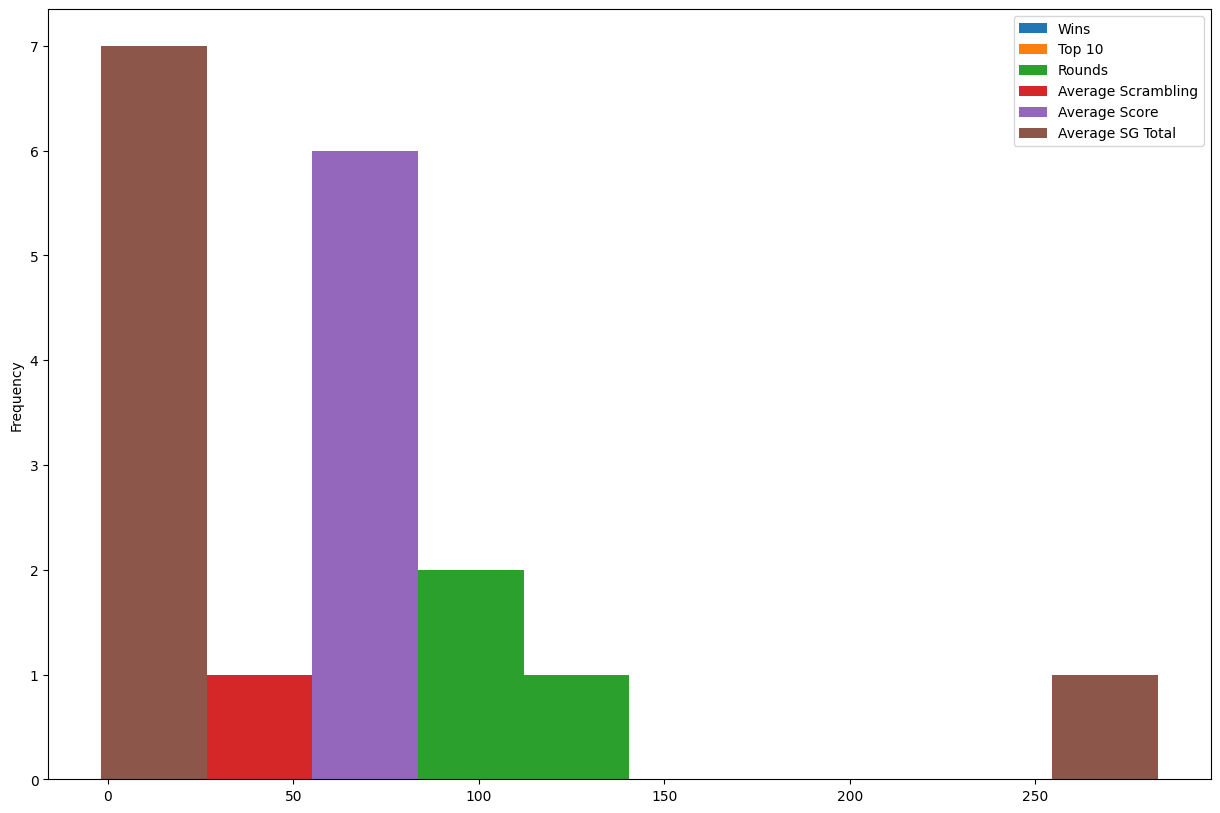

In [15]:
# Make a Distribution plot(histogram or dist plot) for all the features and provide insights on it.


# By this I took some of the most important features of the player I can thinkof and made a distribution plot for them. 


# Making a Distribution plot for all the features
data = amGD[['Wins', 'Top 10', 'Rounds', 'Points',
             'Money', 'Average Scrambling', 'Average Score', 'Average SG Total']].describe()
data.plot(kind='hist', figsize=(15, 10))




### Analysis:

This histogram provides a deep analysis of categorical feature upon which a player stands out as we can see that player has most came in Top10 category. 

In [16]:
# Find the number of players with "Wins" for each year.

# Finding the number of players with "Wins" for each year
amGD['Wins'] = amGD['Wins'].astype(int)
amGD.groupby('Year')['Wins'].count()


Year
2010    26
2011    30
2012    31
2013    28
2014    34
2015    33
2016    33
2017    34
2018    34
Name: Wins, dtype: int64

In [22]:
# f. Find the average number of rounds for each year. Sort them by year.

# Finding the average number of rounds for each year
amGD['Rounds'] = amGD['Rounds'].astype(float)
amGD.groupby('Year')['Rounds'].mean()
# Now sort them by year



Year
2010    79.269231
2011    79.966667
2012    79.806452
2013    78.035714
2014    84.500000
2015    86.636364
2016    84.606061
2017    88.147059
2018    83.970588
Name: Rounds, dtype: float64

In [18]:
# g. Find the five longest hitters(use Avg Distance).

amGD.nlargest(5, 'Avg Distance')

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
162,Rory McIlroy,64.0,55.79,2018,319.7,66.30,28.46,62.97,69.303,1154,1,5.0,0.060,1.412,0.761,0.269,0.322,4410296
732,Dustin Johnson,75.0,55.53,2015,317.7,67.05,28.47,57.85,69.585,1718,1,8.0,0.128,1.455,0.960,0.579,-0.212,5509467
1243,Bubba Watson,68.0,58.84,2012,315.5,69.95,29.73,56.58,69.639,1777,1,5.0,-0.280,1.529,1.485,0.265,0.059,4644997
720,Bubba Watson,71.0,56.55,2015,315.2,69.32,28.96,61.89,69.296,2407,2,7.0,0.212,2.088,1.194,0.684,-0.002,6876797
1451,Bubba Watson,85.0,56.92,2011,314.9,69.83,29.86,50.82,70.625,1577,2,3.0,-0.182,0.593,0.898,0.193,-0.317,3477811


In [19]:
# h. Find the five cheapest players


amGD.sort_values(by=['Money'], ascending=True).head(5)


,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
1004,Scott Brown,65.0,62.32,2013,289.5,64.10,29.03,55.71,71.250,588,1,1.0,-0.217,-0.067,0.338,-0.174,-0.014,1012142
678,J.J. Henry,94.0,60.29,2015,292.3,69.88,30.24,54.30,71.334,620,1,1.0,-0.414,-0.308,0.066,-0.088,0.127,1046123
726,Nick Taylor,91.0,56.05,2015,292.3,64.41,28.80,58.32,71.716,549,1,1.0,0.112,-0.377,-0.080,-0.224,-0.185,1072360
1622,Bill Lunde,79.0,60.71,2010,288.9,65.85,29.77,57.48,71.688,449,1,3.0,-0.012,-0.466,-0.265,-0.263,0.068,1075874
1207,George McNeill,85.0,61.14,2012,288.8,63.03,29.17,57.33,71.011,599,1,1.0,0.238,0.013,-0.149,-0.023,-0.053,1119535
